In [140]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [141]:
#Read csv file
flights = pd.read_csv("flights.csv")

In [142]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [143]:
flights.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object

In [144]:
flights.shape

(160754, 16)

### Clean missing values

In [145]:
flights.isnull().sum()

year            0
month           0
day             0
dep_time     2336
dep_delay    2336
arr_time     2479
arr_delay    2827
carrier         0
tailnum      1433
flight          0
origin          0
dest            0
air_time     2827
distance        0
hour         2336
minute       2336
dtype: int64

In [146]:
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [147]:
flights = flights.dropna()

In [148]:
flights.shape

(157927, 16)

dep_delay 
Minimum:-33.00
Mean:9.41
Median:-2.00
Mode:-4.00
Maximum:1014.00

arr_delay 
Minimum:-75.00
Mean:2.09
Median:-7.00
Mode:-13.00
Maximum:1007.00



/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/3876797827.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/3876797827.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


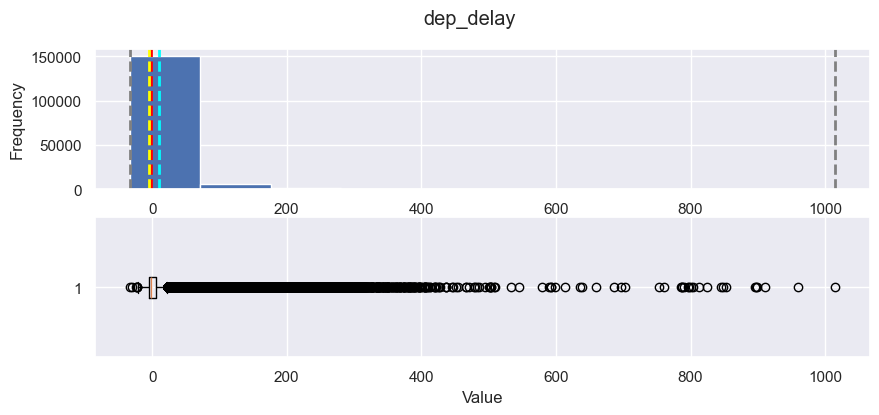

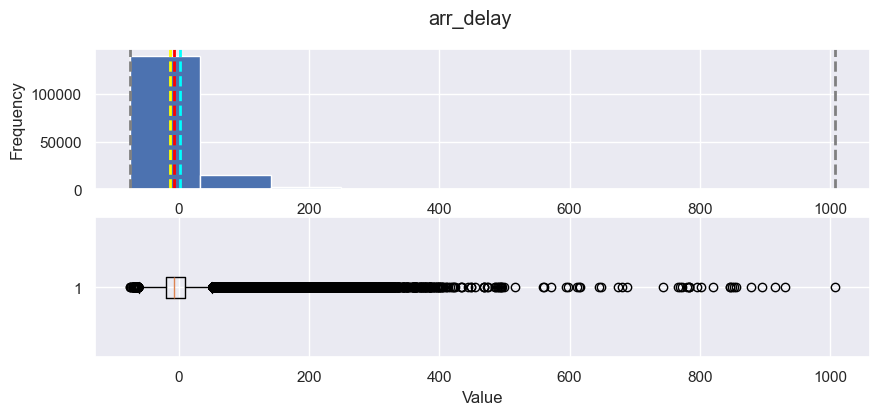

In [149]:
def show_distribution(var_data):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['dep_delay','arr_delay']
for col in delayFields:
    show_distribution(flights[col])


dep_delay 
Minimum:-10.00
Mean:0.61
Median:-2.00
Mode:-4.00
Maximum:37.00

arr_delay 
Minimum:-45.00
Mean:-6.86
Median:-9.00
Mode:-13.00
Maximum:72.00



/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/3876797827.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/3876797827.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


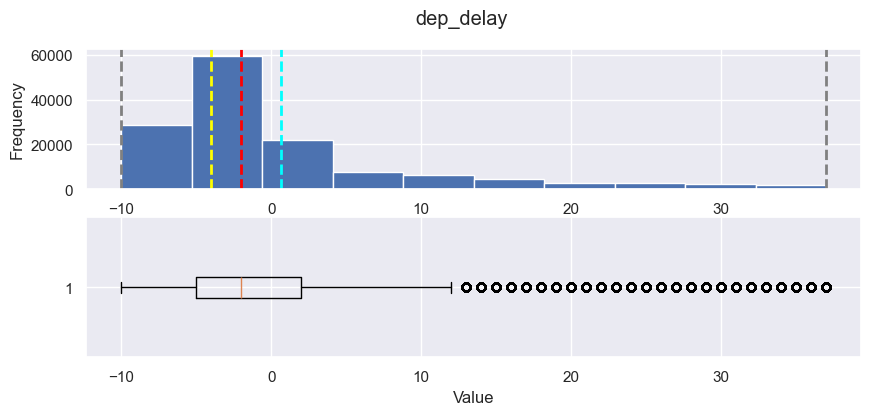

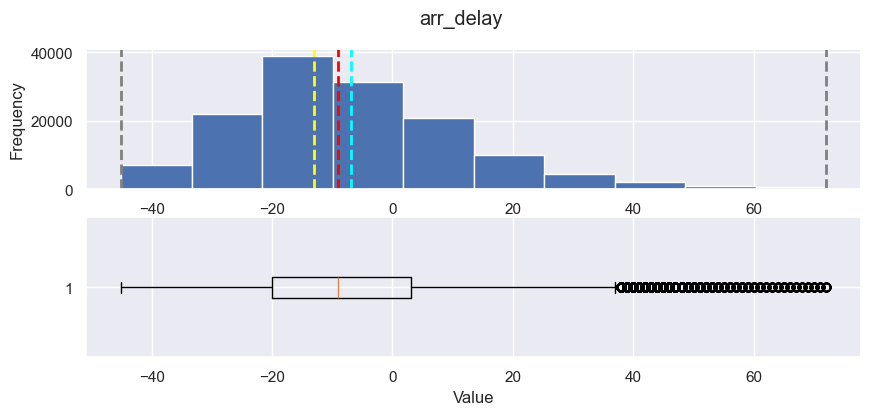

In [150]:
# Trim outliers for ArrDelay based on 1% and 95% percentiles
ArrDelay_01pcntile = flights.arr_delay.quantile(0.01)
ArrDelay_95pcntile = flights.arr_delay.quantile(0.95)
flights = flights[flights.arr_delay < ArrDelay_95pcntile]
flights = flights[flights.arr_delay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 95% percentiles
DepDelay_01pcntile = flights.dep_delay.quantile(0.01)
DepDelay_95pcntile = flights.dep_delay.quantile(0.95)
flights = flights[flights.dep_delay < DepDelay_95pcntile]
flights = flights[flights.dep_delay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(flights[col])

In [151]:
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,138413.0,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000,138413.000000
mean,2013.0,6.575127,15.742185,1273.321039,0.612493,1502.362278,-6.862946,1163.331573,179.989878,1279.312500,12.406855,32.635554
std,0.0,3.441575,8.780321,456.244371,9.175725,480.240789,18.756874,694.221634,97.451064,762.954485,4.578704,18.823985
min,2013.0,1.000000,1.000000,2.000000,-10.000000,1.000000,-45.000000,1.000000,21.000000,94.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,840.000000,-5.000000,1105.000000,-20.000000,512.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1257.000000,-2.000000,1511.000000,-9.000000,1164.000000,153.000000,1076.000000,12.000000,33.000000
75%,2013.0,10.000000,23.000000,1657.000000,2.000000,1920.000000,3.000000,1727.000000,250.000000,1626.000000,16.000000,52.000000
max,2013.0,12.000000,31.000000,2353.000000,37.000000,2400.000000,72.000000,2599.000000,695.000000,4963.000000,23.000000,59.000000


<Figure size 1400x700 with 0 Axes>

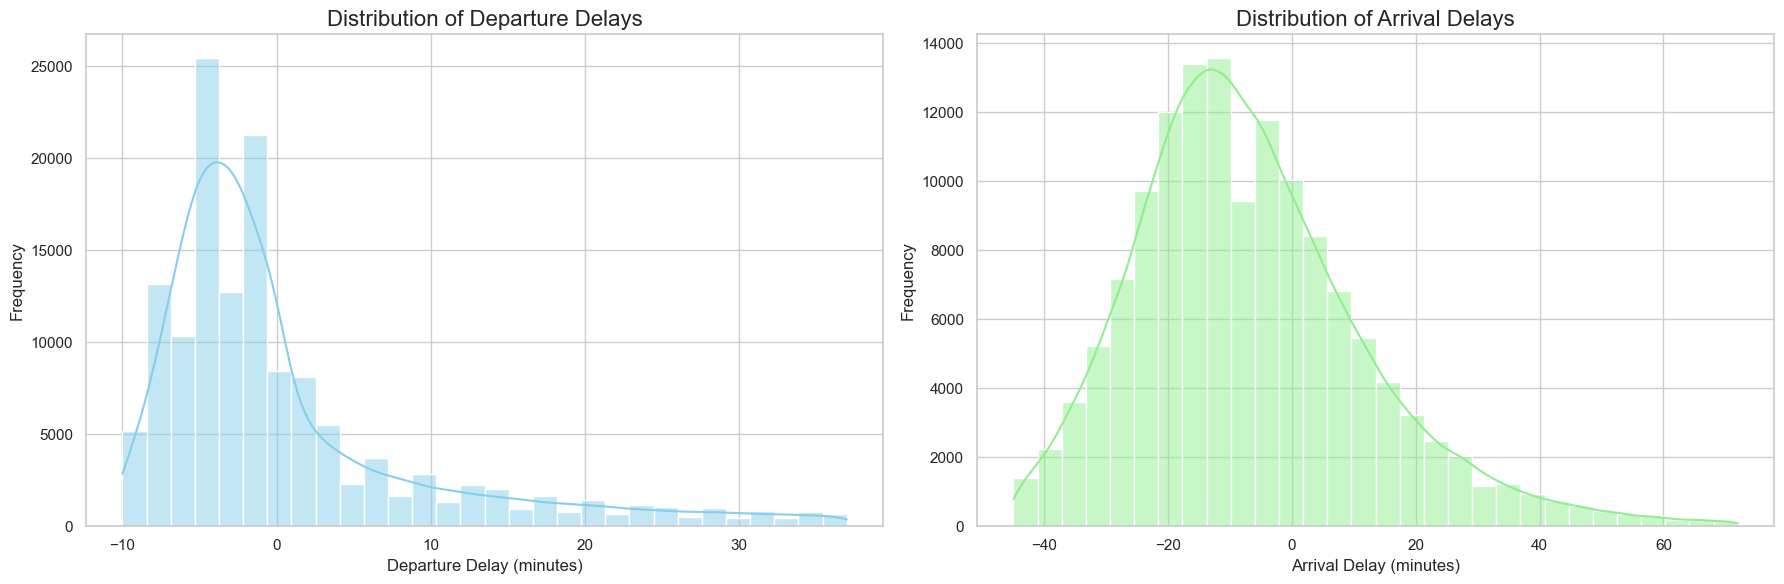

In [152]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Adjusting the figure size for better visibility
plt.figure(figsize=(14, 7))

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Distribution of Departure Delays
sns.histplot(flights['dep_delay'], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Departure Delays', fontsize=16)
ax[0].set_xlabel('Departure Delay (minutes)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Distribution of Arrival Delays
sns.histplot(flights['arr_delay'], bins=30, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Arrival Delays', fontsize=16)
ax[1].set_xlabel('Arrival Delay (minutes)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

# Displaying the plots
plt.tight_layout()
plt.show()

In [153]:
flights2 = flights.pivot_table(index="carrier",columns="origin", values="arr_delay", aggfunc=np.mean)

/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/3229538727.py:1: FutureWarning: The provided callable <function mean at 0x11289e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flights2 = flights.pivot_table(index="carrier",columns="origin", values="arr_delay", aggfunc=np.mean)


/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/551320080.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Carrier', data=carrier_counts, ax=ax[1, 0], palette='viridis')
/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/551320080.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Count', y='Origin', data=origin_counts, ax=ax[1, 1], palette='plasma')
/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/551320080.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count

<Figure size 1800x1800 with 0 Axes>

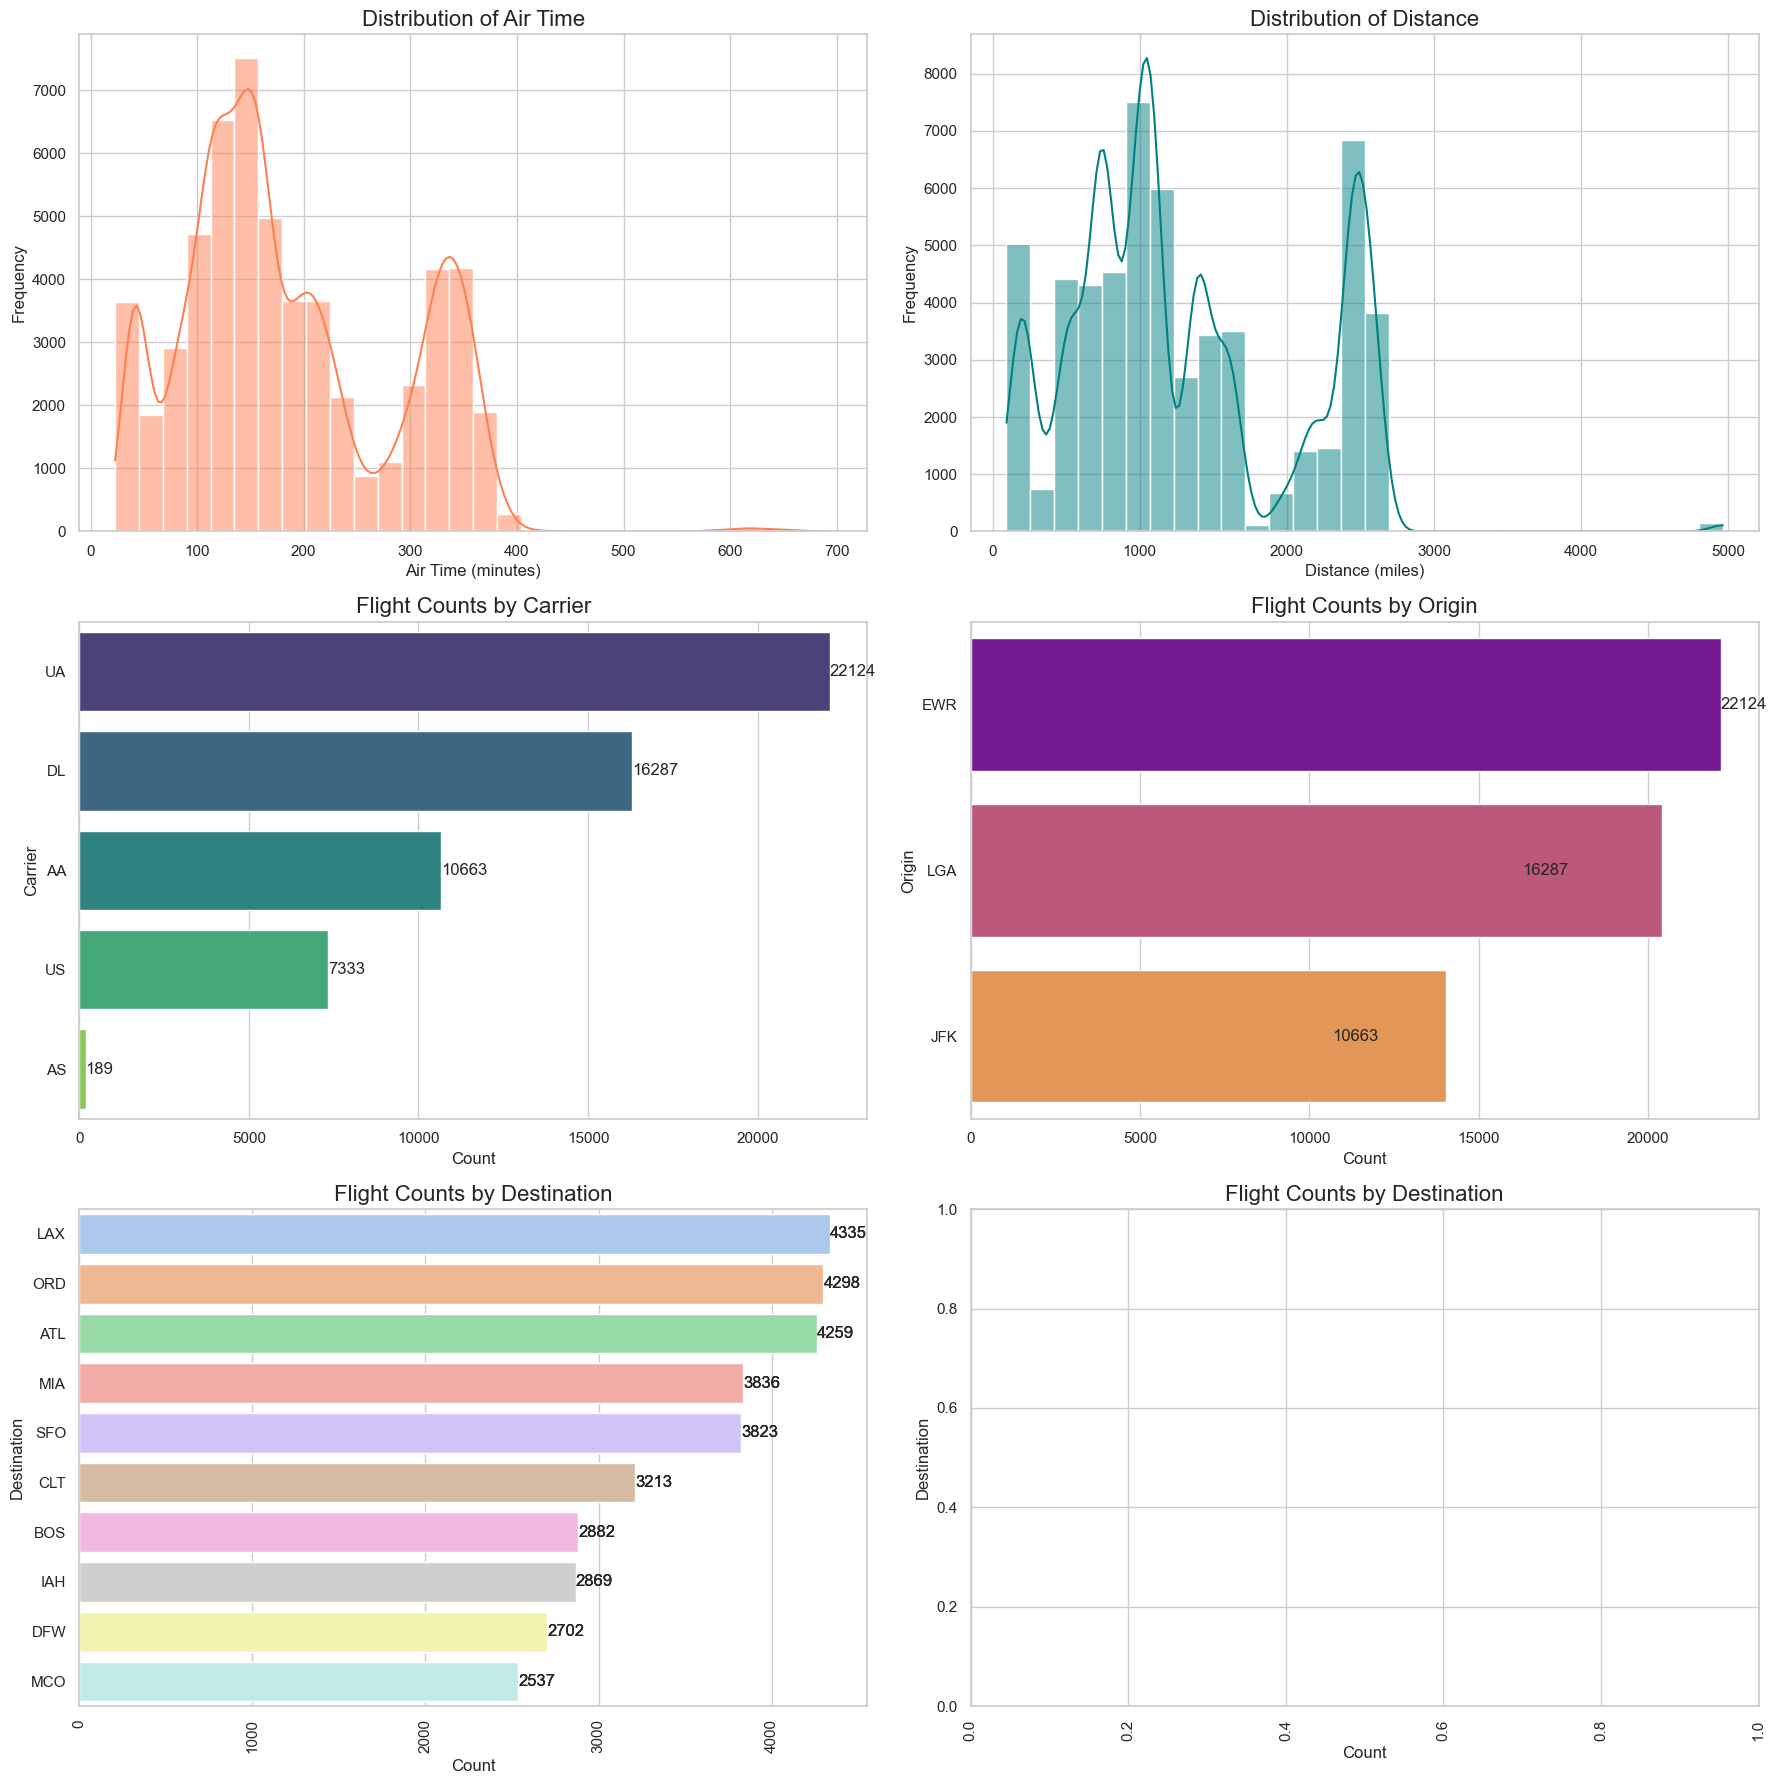

In [154]:
# Adjusting the figure size for better visibility
plt.figure(figsize=(18, 18))

# Creating subplots
fig, ax = plt.subplots(3, 2, figsize=(18, 18))

# For Carrier Count
carrier_counts = flights_filter['carrier'].value_counts().reset_index()
carrier_counts.columns = ['Carrier', 'Count']  # Renaming the columns appropriately

# For Origin Count
origin_counts = flights_filter['origin'].value_counts().reset_index()
origin_counts.columns = ['Origin', 'Count']  # Renaming the columns appropriately

# For Destination Count
dest_counts = flights_filter['dest'].value_counts().reset_index()
dest_counts.columns = ['Destination', 'Count']  # Renaming the columns appropriately
dest_counts = dest_counts.head(10)

# Air Time Distribution
sns.histplot(flights_filter['air_time'], bins=30, kde=True, ax=ax[0, 0], color='coral')
ax[0, 0].set_title('Distribution of Air Time', fontsize=16)
ax[0, 0].set_xlabel('Air Time (minutes)', fontsize=12)
ax[0, 0].set_ylabel('Frequency', fontsize=12)

# Distance Distribution
sns.histplot(flights_filter['distance'], bins=30, kde=True, ax=ax[0, 1], color='teal')
ax[0, 1].set_title('Distribution of Distance', fontsize=16)
ax[0, 1].set_xlabel('Distance (miles)', fontsize=12)
ax[0, 1].set_ylabel('Frequency', fontsize=12)

# Flight Counts by Carrier
sns.barplot(x='Count', y='Carrier', data=carrier_counts, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Flight Counts by Carrier', fontsize=16)
ax[1, 0].set_xlabel('Count', fontsize=12)
ax[1, 0].set_ylabel('Carrier', fontsize=12)
for i in ax[1, 0].containers:
    ax[1, 0].bar_label(i,)
    
# Flight Counts by Origin
g = sns.barplot(x='Count', y='Origin', data=origin_counts, ax=ax[1, 1], palette='plasma')
ax[1, 1].set_title('Flight Counts by Origin', fontsize=16)
ax[1, 1].set_xlabel('Count', fontsize=12)
ax[1, 1].set_ylabel('Origin', fontsize=12)
for i in ax[1, 0].containers:
    ax[1, 1].bar_label(i,)

# Flight Counts by Destination
sns.barplot(x='Count', y='Destination', data=dest_counts, ax=ax[2, 0], palette='pastel', linewidth=1)
ax[2, 0].set_title('Flight Counts by Destination', fontsize=16)
ax[2, 0].set_xlabel('Count', fontsize=12)
ax[2, 0].set_ylabel('Destination', fontsize=12)
ax[2, 0].xaxis.set_tick_params(rotation=90)
for i in ax[2, 0].containers:
    ax[2, 0].bar_label(i,)

# Flight Counts by Destination
sns.barplot(x='Count', y='Destination', data=dest_counts, ax=ax[2, 0], palette='pastel', linewidth=1)
ax[2, 1].set_title('Flight Counts by Destination', fontsize=16)
ax[2, 1].set_xlabel('Count', fontsize=12)
ax[2, 1].set_ylabel('Destination', fontsize=12)
ax[2, 1].xaxis.set_tick_params(rotation=90)
for i in ax[2, 0].containers:
    ax[2, 0].bar_label(i,)
    
# Displaying the plots
plt.tight_layout()
plt.show()

/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/24332516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carrier', y=col, data=flights, palette='Set2')


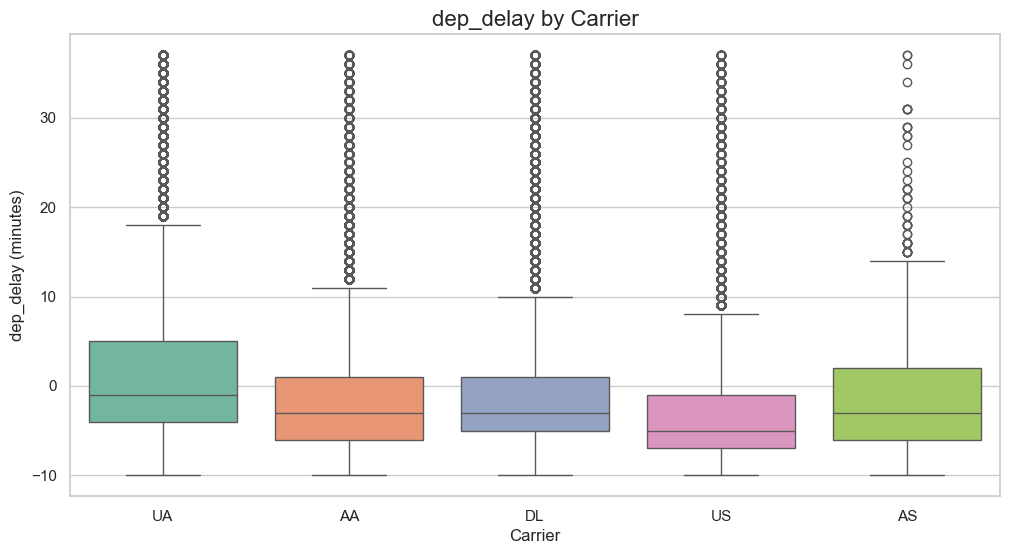

/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/24332516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carrier', y=col, data=flights, palette='Set2')


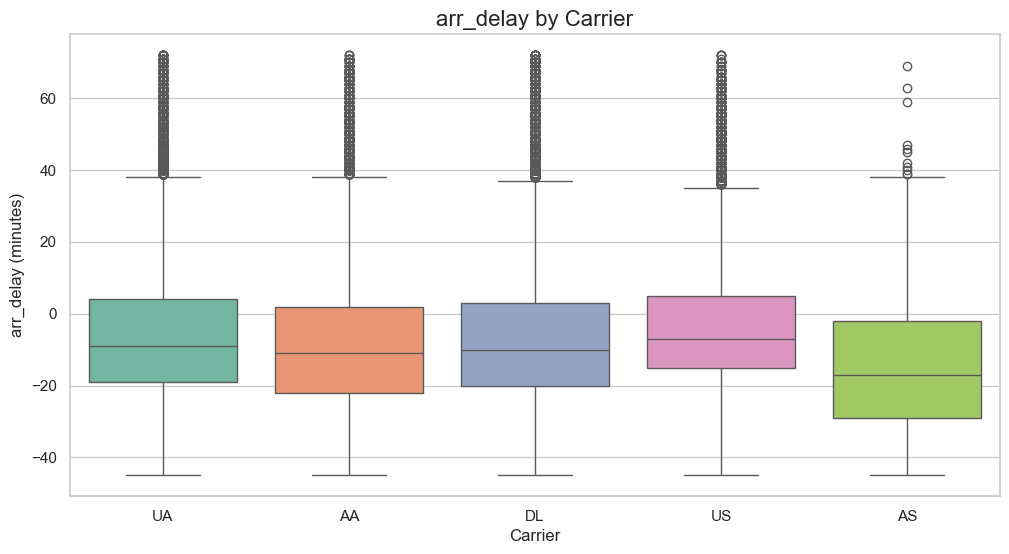

In [155]:
for col in delayFields:
    #flights.boxplot(column=col, by='carrier', figsize=(8,8))
    # Creating a box plot for Departure Delay by Carrier
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='carrier', y=col, data=flights, palette='Set2')
    plt.title(col+' by Carrier', fontsize=16)
    plt.xlabel('Carrier', fontsize=12)
    plt.ylabel(col+' (minutes)', fontsize=12)
    plt.show()

<Figure size 1800x600 with 0 Axes>

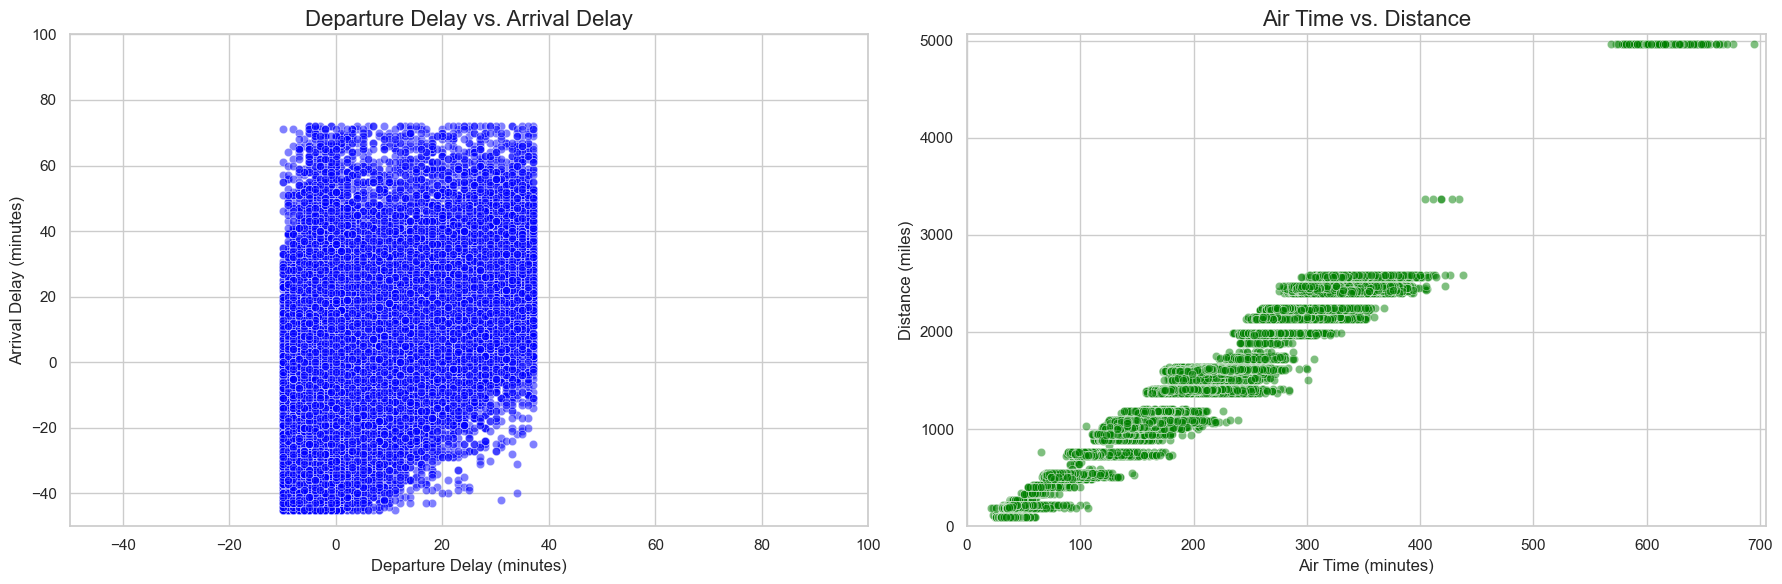

In [158]:
# Adjusting the figure size for better visibility for the scatter plots
plt.figure(figsize=(18, 6))

# Creating subplots for scatter plots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for Departure Delay vs. Arrival Delay
sns.scatterplot(x='dep_delay', y='arr_delay', data=flights, ax=ax[0], color='blue', alpha=0.5)
ax[0].set_title('Departure Delay vs. Arrival Delay', fontsize=16)
ax[0].set_xlabel('Departure Delay (minutes)', fontsize=12)
ax[0].set_ylabel('Arrival Delay (minutes)', fontsize=12)
ax[0].set_xlim(-50, 100)  # Limiting to observe the general trend excluding extreme outliers
ax[0].set_ylim(-50, 100)

# Scatter plot for Air Time vs. Distance
sns.scatterplot(x='air_time', y='distance', data=flights, ax=ax[1], color='green', alpha=0.5)
ax[1].set_title('Air Time vs. Distance', fontsize=16)
ax[1].set_xlabel('Air Time (minutes)', fontsize=12)
ax[1].set_ylabel('Distance (miles)', fontsize=12)
ax[1].set_xlim(0, max(flights['air_time'])+10)  # Adjusting limits to include most data points
ax[1].set_ylim(0, max(flights['distance'])+100)

# Displaying the scatter plots
plt.tight_layout()
plt.show()


,dep_delay
origin,
EWR,2.118675
JFK,0.600534
LGA,-0.875549


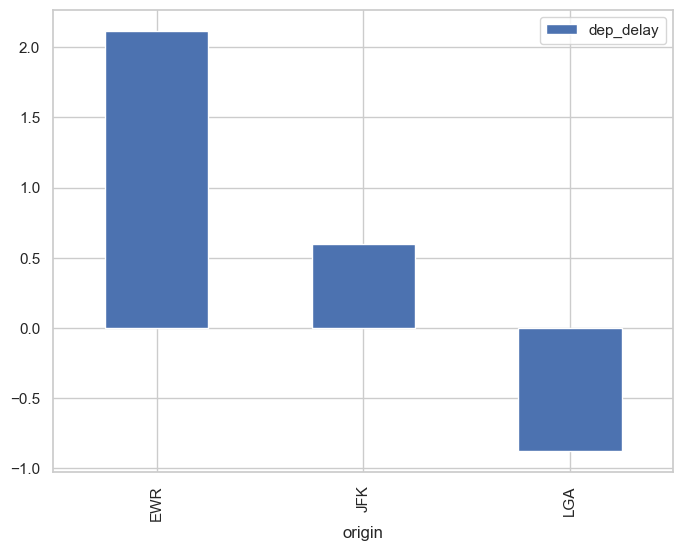

In [159]:
departure_airport_group = flights.groupby(flights.origin)

mean_departure_delays = pd.DataFrame(departure_airport_group['dep_delay'].mean()).sort_values('dep_delay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(8,6))
mean_departure_delays

,dep_delay
carrier,
UA,2.432594
DL,0.281407
AS,-0.343013
AA,-0.498933
US,-1.961573


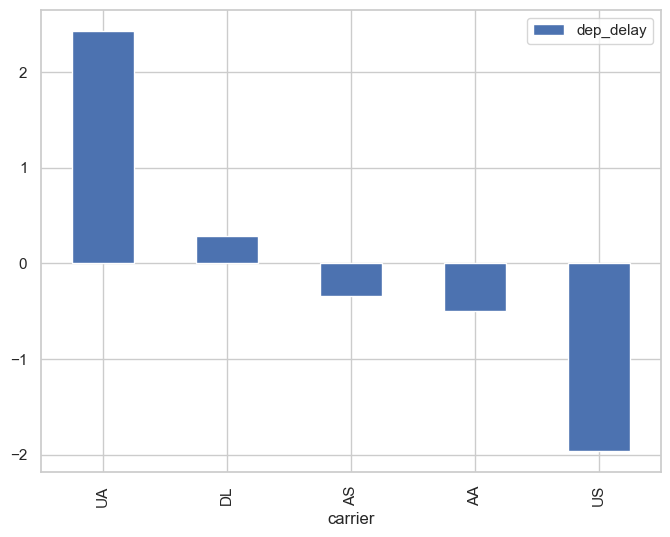

In [160]:
departure_airport_group = flights.groupby(flights.carrier)

mean_departure_delays = pd.DataFrame(departure_airport_group['dep_delay'].mean()).sort_values('dep_delay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(8,6))
mean_departure_delays

In [161]:
flights2 = flights.pivot_table(index="carrier",columns="origin", values="arr_delay", aggfunc=np.mean)

/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/3229538727.py:1: FutureWarning: The provided callable <function mean at 0x11289e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flights2 = flights.pivot_table(index="carrier",columns="origin", values="arr_delay", aggfunc=np.mean)


In [162]:
flights2

origin,EWR,JFK,LGA
carrier,,,
AA,-9.776014,-7.805978,-9.359457
AS,-13.794918,NaN,NaN
DL,-3.931836,-9.758019,-6.249099
UA,-6.032729,-6.089134,-7.302612
US,-4.856524,-3.635150,-3.703347


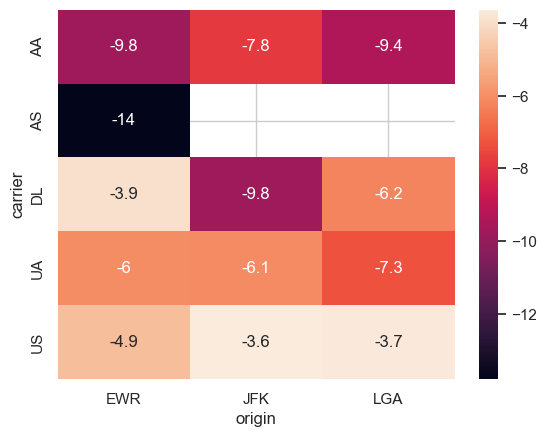

In [163]:
ax = sns.heatmap(flights2, annot=True)

/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_52259/4102484149.py:1: FutureWarning: The provided callable <function mean at 0x11289e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flights3 = flights.pivot_table(index="carrier",columns="origin", values="dep_delay", aggfunc=np.mean)


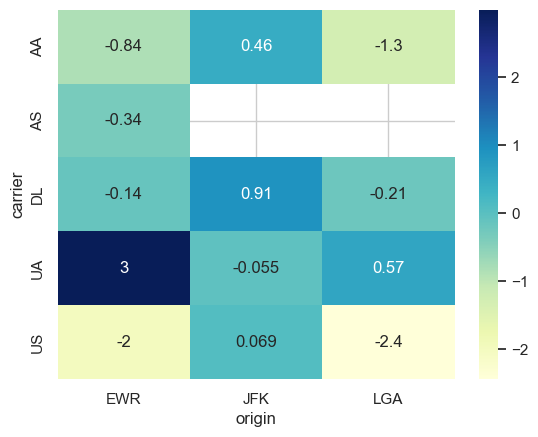

In [164]:
flights3 = flights.pivot_table(index="carrier",columns="origin", values="dep_delay", aggfunc=np.mean)
ax1 = sns.heatmap(flights3, annot=True, cmap="YlGnBu")

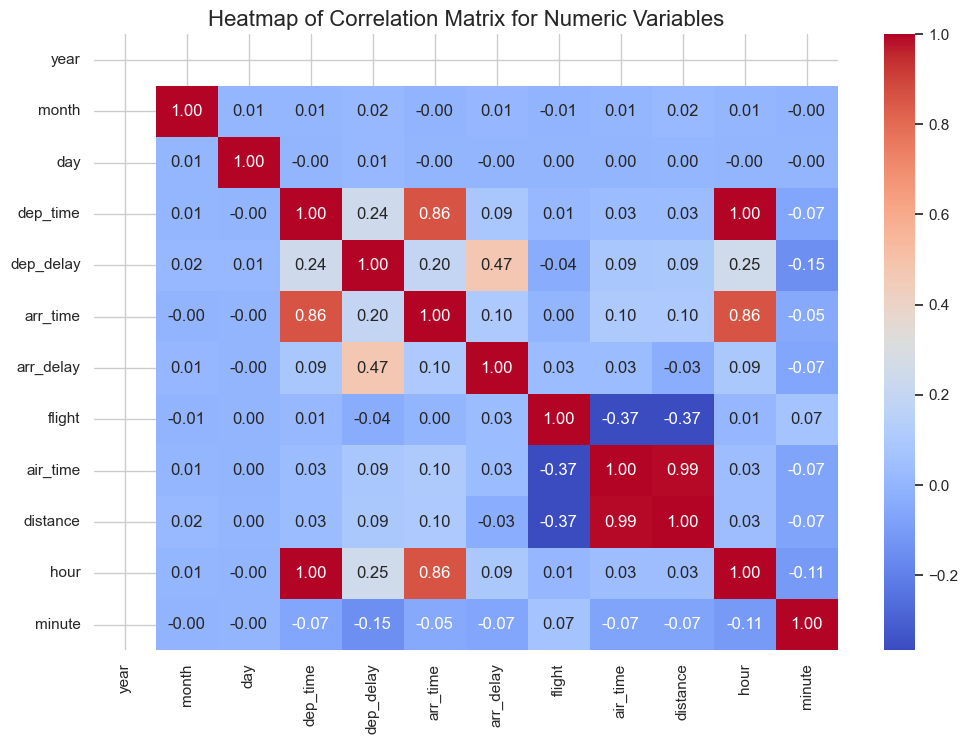

In [165]:
# Selecting only numeric columns for correlation
numeric_df = flights.select_dtypes(include=['float64', 'int64'])

# Recompute the correlation matrix with only numeric columns
corr_matrix_numeric = numeric_df.corr()

# Attempt to generate the heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Numeric Variables', fontsize=16)
plt.show()